## Pytorch Tutorials : Dataset & Dataloader
- [Pytorch Tutorials](https://pytorch.org/tutorials/)
- [Dataset & Dataloader](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

In [1]:
%matplotlib inline

### Loading a Dataset
- Fashion-MNIST : Zalando의 기사 이미지 데이터 세트, 6만개의 train set과 1만개의 test set으로 구성
  > 28×28 gray scale image, 10개 클래스 중 하나의 라벨로 구성

- `root` : train, test dataset 저장 경로
- `download=True` : 해당 옵션은 root 옵션을 사용할 수 없는 경우 인터넷에서 데이터를 다운로드 함
- ~`transform`, `target_transform` : feature & label 변환 지정

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### Iterating and Visualizing the Dataset
`training_data[index]` : 데이터셋을 직접 인덱싱 가능



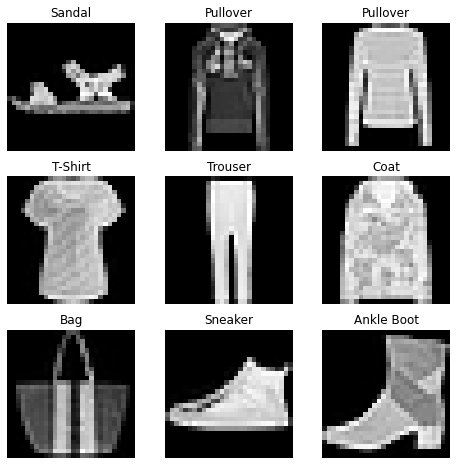

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Creating a Custom Dataset for your files
커스텀 데이터셋의 경우 `__init__`, `__len__`, `__getitem__`의 세 가지 함수를 구현해야 함

In [4]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

`__init__`는 Dataset 개체를 인스턴스화할 때 한 번 실행

In [5]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

`__len__`는 데이터 집합의 샘플 수를 반환

In [6]:
def __len__(self):
    return len(self.img_labels)

`__getitem__`함수는 지정된 인덱스 idx의 데이터 집합에서 샘플을 로드하고 반환  
인덱스에 기초하여, 디스크 상의 이미지의 위치를 식별하고, read_image를 사용하여 텐서로 변환하고, self.img_labels의 csv 데이터로부터 해당 레이블을 검색하며, 변환 함수를 호출하고, 텐서 이미지와 튜플의 해당 레이블을 반환합니다.

In [7]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

### Preparing your data for training with DataLoaders 
Dataset은 Dataset의 feature과 label을 한 번에 하나씩 검색합니다. 모델을 학습하는 동안, 우리는 일반적으로 샘플을 "미니배치"로 전달하고, 모델 과적합을 줄이기 위해 매 epoch마다 데이터를 재구성하며, 다중 처리를 사용하여 데이터 검색 속도를 높이고자 한다.

In [8]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterate through the DataLoader
Dataset를 DataLoader에 로드했으며 필요에 따라 Dataset를 반복할 수 있습니다.   
아래의 각 반복은 train_size 및 train_size의 배치를 반환합니다 (각각 batch_size=64개의 특징과 라벨 포함) shuffle=true를 지정했기 때문에 모든 배치에 걸쳐 반복한 후 데이터가 섞인다

Feature batch ㅁshape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


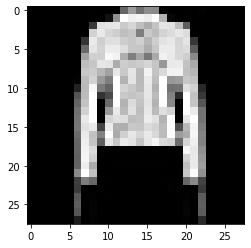

Label: 4


In [9]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch ㅁshape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")